In [14]:
%matplotlib notebook 
# Import modules
import math
import numpy as np
import matplotlib.pyplot
import csv
from pyne import serpent
from pyne import nucname
from scipy.stats.stats import pearsonr 
import scipy.integrate as inte

dir_pre='/home/andrei2/Desktop/git/publications/2020-rykhl-dissertation/data/spectrum/'
det0 = serpent.parse_det(dir_pre+'bol/tap_spectrum.serpent_det0.m')

det10 = serpent.parse_det(dir_pre+'eol/tap_spectrum_eol_ben.serpent_det0.m')
#det10 = serpent.parse_det('/home/andrei2/Desktop/git/msr-neutronics/RobertsonMSBR/neutronics_paper/reproc/eoc/core_det0.m')
energy_grid = det0['DETavrgE']
spectrum_grid = det0['DETavrg']
spectrum_grid2 = det10['DETavrg']
energy = energy_grid[:,2]
energy2 = det10['DETavrgE'][:,2]
flux_spectrum = spectrum_grid[:,10]
lat_v = 2*155*2*155*2*180
flux_bol = spectrum_grid[:,10]/lat_v #1.490277013
flux_eol = 1.490277013*spectrum_grid2[:,10]/lat_v
print(len(flux_bol), len(flux_eol))

2112 1761


# Read data fron Ben's paper digitized

In [12]:
fben_bol = dir_pre + 'bol/ben_full_BOL.csv'
fben_eol = dir_pre + 'eol/ben_full_EOL.csv'

ene_grid_bol = []
ben_flux_bol = []
ene_grid_eol = []
ben_flux_eol = []

with open(fben_bol, 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        ene_grid_bol.append(float(row[0]))
        ben_flux_bol.append(float(row[1]))

with open(fben_eol, 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        ene_grid_eol.append(float(row[0]))
        ben_flux_eol.append(float(row[1]))        

<IPython.core.display.Javascript object>


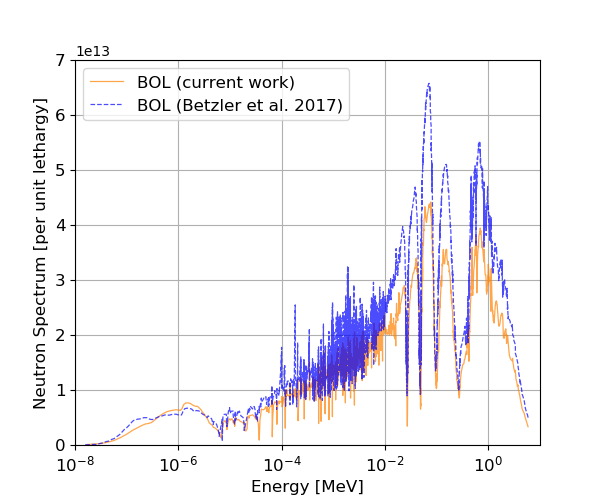

4.419007977800902
Correlation between neutron Betzler and current work is (0.9101443736355502, 0.0)
Relative difference in total flux between Betzler and current work 27.992108 %


In [15]:
# Initialize figure
fig_1 = matplotlib.pyplot.figure(1, figsize=[6,5])
ax1 = fig_1.add_subplot(111)
ax1.grid(True)
ax1.set_xlabel('Energy [MeV]', fontsize=12)
ax1.set_ylabel('Neutron Spectrum [per unit lethargy]', fontsize=12)
ax1.tick_params('y', labelsize=12)
ax1.tick_params('x', labelsize=12)
ax1.set_ylim(0,7.0E+13)
ax1.set_xlim(1e-8,10)

ax1.semilogx(energy, flux_bol, '-', label='BOL (current work)', 
            color='#ff8100', linewidth=0.9, alpha=0.7)
#ax1.semilogx(energy2, 1.490277013*spectrum_grid2[:,10]/lat_v, '-', label='EOL (current work)', 
#           color='b', linewidth=1.3)

ax1.semilogx(ene_grid_bol, ben_flux_bol, '--', label='BOL (Betzler et al. 2017)', 
            color='blue', linewidth=0.9, alpha=0.7)
#ax1.semilogx(ene_grid_eol, ben_flux_eol, ':', label='EOL (Betzler et al. 2017)', 
#           color='g', linewidth=0.9)
ax1.legend(loc=0, fontsize=12)

#ax2=ax1.twinx()
#ax2.loglog(energy_grid_xe, xe_capture_xs, 'o-',markevery=[100,210],fillstyle='none',color='r',label='Xe135')
#ax2.loglog(energy_grid_i, i_capture_xs, '*--',markevery=[92,125],fillstyle='none',color='r',label='I135')
#ax2.set_ylabel('Capture cross-section [b]', color='r', fontsize=14)
#ax2.tick_params('y', colors='r', labelsize=12)
#ax2.set_xlim(1e-9,12)
#ax2.legend(loc=7, fontsize=12)
#ax1.set_title('Neutron spectrum normalized per unit lethargy for \n PWR/TAP vs posions capture cross-section\n')

fig_1.show()
#fig_1.savefig('/home/andrei2/Desktop/git/publications/2020-rykhl-dissertation/dissertation/figures/ch4/ben_spec_bol.png',bbox_inches='tight', dpi=900)
print(np.amax(1e-13*spectrum_grid[:,10]/lat_v))

print ("Correlation between neutron Betzler and current work is "
           + str(pearsonr(flux_bol,ben_flux_bol[:-1])  ) )
delta = 100*abs(inte.trapz(flux_bol,energy)-inte.trapz(ben_flux_bol,ene_grid_bol))/inte.trapz(ben_flux_bol,ene_grid_bol)
print('Relative difference in total flux between Betzler and current work %f %%' %delta)

<IPython.core.display.Javascript object>


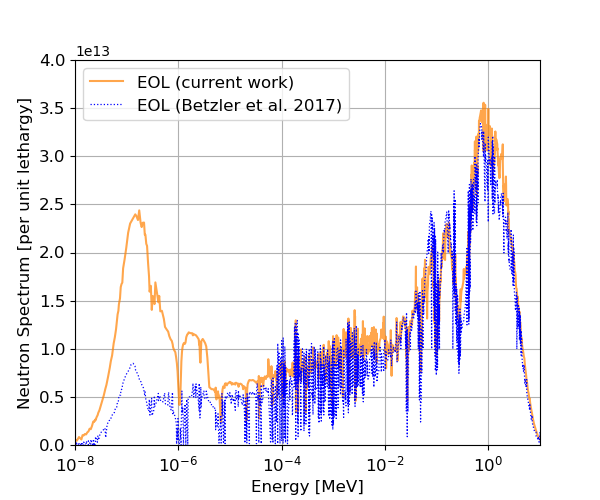

Correlation between neutron Betzler and current work is (0.8997504698182227, 0.0)
Relative difference in total flux between Betzler and current work 13.278953 %


In [9]:
# Initialize figure
fig_2 = matplotlib.pyplot.figure(2, figsize=[6,5])
ax1 = fig_2.add_subplot(111)
ax1.grid(True)
ax1.set_xlabel('Energy [MeV]', fontsize=12)
ax1.set_ylabel('Neutron Spectrum [per unit lethargy]', fontsize=12)
ax1.tick_params('y', labelsize=12)
ax1.tick_params('x', labelsize=12)
ax1.set_ylim(0,4.0E+13)
ax1.set_xlim(1e-8,10)

ax1.semilogx(energy2, flux_eol, '-', label='EOL (current work)', 
           color='#ff8100', linewidth=1.5, alpha=0.7)

ax1.semilogx(ene_grid_eol, ben_flux_eol, ':', label='EOL (Betzler et al. 2017)', 
           color='blue', linewidth=0.9)
ax1.legend(loc=0, fontsize=12)

#ax2=ax1.twinx()
#ax2.loglog(energy_grid_xe, xe_capture_xs, 'o-',markevery=[100,210],fillstyle='none',color='r',label='Xe135')
#ax2.loglog(energy_grid_i, i_capture_xs, '*--',markevery=[92,125],fillstyle='none',color='r',label='I135')
#ax2.set_ylabel('Capture cross-section [b]', color='r', fontsize=14)
#ax2.tick_params('y', colors='r', labelsize=12)
#ax2.set_xlim(1e-9,12)
#ax2.legend(loc=7, fontsize=12)
#ax1.set_title('Neutron spectrum normalized per unit lethargy for \n PWR/TAP vs posions capture cross-section\n')

fig_2.show()
#fig_2.savefig('/home/andrei2/Desktop/git/publications/2020-rykhl-dissertation/dissertation/figures/ch4/ben_spec_eol.png',bbox_inches='tight', dpi=900)
print ("Correlation between neutron Betzler and current work is "
           + str(pearsonr(flux_eol,ben_flux_eol[:-1])  ) )
delta_eol = 100*abs(inte.trapz(flux_eol,energy2)-inte.trapz(ben_flux_eol,ene_grid_eol))/inte.trapz(ben_flux_eol,ene_grid_eol)
print('Relative difference in total flux between Betzler and current work %f %%' %delta_eol)